In [521]:
import pandas as pd
import os
import numpy as np
import pickle
from datetime import datetime, time
import matplotlib.pyplot as plt
from inspect import signature

In [522]:
os.chdir(r"C:\Users\shantanu.sharma\Desktop\HC")

In [575]:
df=pd.read_csv(r"C:\Users\shantanu.sharma\Desktop\HC\Data Files\hm_features_dv_existing_customers.csv")

In [524]:
df.head()

,first_txn_date_lazypay,mobile_hash,dv,filter,is_repaid,total_count_12month,total_amount_12month,sale_count_12month,sale_amount_12month,total_count_6month,...,dc_sale_per,ecommerce_ratio_180,acc_30_180_amount,acc_90_360_amount,acc_180_360_count,acc_180_360_amount,acc_30_90_amount_cc,acc_90_180_amount_cc,acc_180_360_amount_cc,scoring_date
0,01-04-2019,6306263143,0,1,Y,2,1500.0,1,750.0,2,...,0.000000,0.333333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,31-12-2019
1,01-04-2019,6351342162,0,1,Y,2,2940.0,0,0.0,2,...,0.000000,0.000000,1.0,1.0,1.0,1.0,-10.0,-10.0,-10.0,31-12-2019
2,01-04-2019,6354606412,0,1,Y,1,1.0,0,0.0,0,...,-10.000000,-10.000000,-10.0,0.0,0.0,0.0,-10.0,-10.0,-10.0,31-12-2019
3,01-04-2019,6375588533,1,1,Y,1,1.0,1,1.0,0,...,-10.000000,-10.000000,-10.0,0.0,0.0,0.0,-10.0,-10.0,-10.0,31-12-2019
4,01-04-2019,6387110039,0,1,Y,3,727.0,1,75.0,3,...,0.333333,0.103164,0.0,1.0,1.0,1.0,-10.0,-10.0,-10.0,31-12-2019


In [525]:
df.describe().transpose().to_csv("describe_raw_data.csv")

In [526]:
pd.DataFrame(df.dtypes).to_csv("datatypes.csv")

In [527]:
for x in df.columns:
    print(df[x].value_counts())


06-04-2019    1916
14-04-2019    1769
07-04-2019    1704
12-05-2019    1617
11-04-2019    1613
05-05-2019    1596
21-04-2019    1563
13-04-2019    1537
14-05-2019    1515
11-05-2019    1514
08-05-2019    1509
08-04-2019    1501
12-04-2019    1479
10-05-2019    1472
09-04-2019    1471
19-05-2019    1460
10-04-2019    1458
09-05-2019    1457
15-05-2019    1457
01-05-2019    1444
15-04-2019    1429
16-04-2019    1417
17-04-2019    1408
19-04-2019    1377
20-05-2019    1377
16-05-2019    1376
22-04-2019    1375
23-04-2019    1368
04-05-2019    1361
18-05-2019    1361
13-05-2019    1360
03-05-2019    1352
17-05-2019    1346
07-05-2019    1329
28-04-2019    1328
18-04-2019    1312
04-04-2019    1309
02-05-2019    1301
26-04-2019    1300
05-04-2019    1299
06-05-2019    1270
02-04-2019    1264
29-04-2019    1258
01-04-2019    1252
24-04-2019    1241
30-04-2019    1219
20-04-2019    1214
03-04-2019    1200
27-04-2019    1128
25-04-2019    1062
Name: first_txn_date_lazypay, dtype: int64
9452128

0.0       68697
1.0          18
100.0        12
1000.0        8
2.0           7
          ...  
2025.0        1
348.0         1
1950.0        1
2542.0        1
2766.0        1
Name: declined_amount_180, Length: 1209, dtype: int64
0     67428
1      1537
2       630
3       272
4       149
5        71
6        41
7        33
8        24
9        15
10       13
11        8
12        4
13        3
14        3
19        3
18        2
20        2
29        2
49        1
16        1
21        1
37        1
58        1
Name: declined_count_360, dtype: int64
0.0       67428
1.0         152
2.0          59
100.0        14
3.0          14
          ...  
175.3         1
2754.0        1
3339.0        1
435.0         1
2766.0        1
Name: declined_amount_360, Length: 1940, dtype: int64
0     69213
1       611
2       217
3        78
4        36
5        27
6        17
7         9
9         8
8         7
11        7
10        5
12        4
27        1
13        1
14        1
16        1
19       

0     69590
1       424
2       106
3        52
5        18
4        17
6        10
8         6
7         5
11        4
9         3
63        1
38        1
12        1
15        1
17        1
20        1
22        1
28        1
32        1
10        1
Name: Windows_count_360, dtype: int64
0.00       69590
199.00        14
278.12        13
399.00        11
1850.00        8
           ...  
90.00          1
1280.00        1
6788.50        1
79.20          1
1328.00        1
Name: Windows_amount_360, Length: 481, dtype: int64
0.000000    70171
1.000000       32
0.500000       21
0.333333        3
0.200000        3
0.666667        3
0.250000        2
0.166667        2
0.285714        1
0.571429        1
0.066667        1
0.600000        1
0.142857        1
0.400000        1
0.727273        1
0.125000        1
Name: Windows_count_30_ratio, dtype: int64
0.000000    70171
1.000000       32
0.500000        8
0.250000        2
0.200000        2
0.026908        1
0.410127        1
0.760930      

Name: Apple_amount_30, Length: 789, dtype: int64
0      53484
1       7503
2       4092
3       1967
4       1076
       ...  
93         1
221        1
95         1
33         1
63         1
Name: Apple_count_90, Length: 71, dtype: int64
0.0        53484
100.0         62
35.0          56
200.0         50
1518.0        49
           ...  
13469.0        1
4620.0         1
525.0          1
8106.0         1
5810.0         1
Name: Apple_amount_90, Length: 7763, dtype: int64
0      38716
1       9510
2       5438
3       3839
4       3172
       ...  
145        1
144        1
80         1
115        1
127        1
Name: Apple_count_180, Length: 124, dtype: int64
0.00        38716
1.00          715
100.00        166
2.00           91
399.00         86
            ...  
3652.00         1
11038.00        1
13328.84        1
5014.00         1
5580.79         1
Name: Apple_amount_180, Length: 14922, dtype: int64
1      16462
0      15723
2       8248
3       5382
4       4059
       ...  
483 

-10.000000    54906
 0.000000     13891
 1.000000      1112
 0.500000       122
 0.333333        42
 0.666667        32
 0.250000        21
 0.750000        15
 0.600000        10
 0.200000         8
 0.400000         8
 0.875000         7
 0.166667         6
 0.142857         6
 0.571429         5
 0.714286         5
 0.428571         5
 0.800000         4
 0.833333         3
 0.285714         3
 0.111111         2
 0.375000         2
 0.125000         2
 0.363636         2
 0.857143         2
 0.066667         2
 0.050000         1
 0.153846         1
 0.444444         1
 0.133333         1
 0.625000         1
 0.533333         1
 0.416667         1
 0.793103         1
 0.545455         1
 0.100000         1
 0.777778         1
 0.733333         1
 0.888889         1
 0.848485         1
 0.785714         1
 0.937500         1
 0.956522         1
 0.300000         1
 0.555556         1
 0.045455         1
 0.842105         1
 0.631579         1
Name: ratio_count_dc_in_ecom_360, dtype:

-10      6274
 335      141
 272      137
 265      130
 332      130
         ... 
 2588       1
 1501       1
 2348       1
 2284       1
 1671       1
Name: days_since_first_failed_trans, Length: 2333, dtype: int64
-10     68876
 149        6
 135        6
 412        6
 2          6
        ...  
 38         1
 422        1
 614        1
 678        1
 479        1
Name: days_since_first_refund_trans, Length: 763, dtype: int64
-10     70225
 3          2
 56         1
 64         1
 128        1
 5          1
 11         1
 75         1
 77         1
 14         1
 15         1
 79         1
 19         1
 29         1
 351        1
 33         1
 103        1
 104        1
 43         1
 0          1
Name: days_since_first_apple_trans, dtype: int64
-10      68871
 81         16
 73         16
 61         14
 84         14
         ...  
 868         1
 1316        1
 357         1
 613         1
 159         1
Name: days_since_first_android_trans, Length: 534, dtype: int64
-10    

-10.000000    49376
 0.000000     12382
 1.000000      2417
 0.500000       857
 0.333333       509
              ...  
 0.703704         1
 0.227273         1
 0.057143         1
 0.565217         1
 0.026178         1
Name: top_merchants_txn_count_360_ratio, Length: 401, dtype: int64
-10.000000    49376
 0.000000     12382
 1.000000      2417
 0.500000       101
 0.900000         9
              ...  
 0.000961         1
 0.038817         1
 0.046912         1
 0.156571         1
 0.003800         1
Name: top_merchants_txn_amount_360_ratio, Length: 5869, dtype: int64
0     70070
1       118
2        25
3        16
4         6
5         4
6         3
14        1
8         1
7         1
Name: top_merchants_txn_cc_count_30, dtype: int64
0.0       70070
499.0         4
399.0         4
35.0          4
119.0         4
          ...  
9537.0        1
299.0         1
364.0         1
2405.0        1
1066.0        1
Name: top_merchants_txn_cc_amount_30, Length: 147, dtype: int64
 0.000000     

1      18238
2       9169
3       6623
4       5206
5       4273
       ...  
806        1
144        1
422        1
164        1
191        1
Name: top_transaction_status_count, Length: 220, dtype: int64
1.00        8710
2.00        1081
3.00         306
100.00       222
200.00       164
            ... 
15406.00       1
19650.36       1
23168.00       1
187.25         1
11783.00       1
Name: top_transaction_status_amount, Length: 31604, dtype: int64
1.000000    31442
0.500000     5050
0.666667     4842
0.750000     3238
0.800000     2361
            ...  
0.778761        1
0.836910        1
0.748299        1
0.574074        1
0.637195        1
Name: top_transaction_status_count_per, Length: 993, dtype: int64
1.000000    31474
0.500000     1875
0.666667     1063
0.750000      571
0.800000      359
            ...  
0.571769        1
0.905694        1
0.888260        1
0.727053        1
0.666570        1
Name: top_transaction_status_amount_per, Length: 32762, dtype: int64
1      28592

-10.000000    34164
 0.000000     19773
 1.000000      2700
 0.500000      2294
 0.333333      1766
              ...  
 0.114583         1
 0.138889         1
 0.144737         1
 0.010638         1
 0.257576         1
Name: dc_sale_per, Length: 447, dtype: int64
-10.000000    34164
 0.000000     31575
 1.000000       588
 0.500000       224
 0.250000        72
              ...  
 0.187367         1
 0.116841         1
 0.292358         1
 0.003092         1
 0.152728         1
Name: ecommerce_ratio_180, Length: 3409, dtype: int64
-10.000000    34164
 0.000000     24143
 1.000000      2181
 0.500000       362
 0.333333       339
              ...  
 0.040750         1
 0.179266         1
 0.001497         1
 0.473067         1
 0.161760         1
Name: acc_30_180_amount, Length: 7105, dtype: int64
 0.000000     34295
-10.000000    12382
 1.000000      4648
 0.500000       513
 0.333333       249
              ...  
 0.299854         1
 0.999542         1
 0.363022         1
 0.432989

In [576]:
df["first_txn_date_lazypay"] = pd.to_datetime(df["first_txn_date_lazypay"], format = "%d-%m-%Y")
df["first_txn_date_lazypay"].agg(["max","min"])
df["month"]= pd.to_datetime(df["first_txn_date_lazypay"], format = "%d-%m-%Y").dt.strftime("%Y-%m")

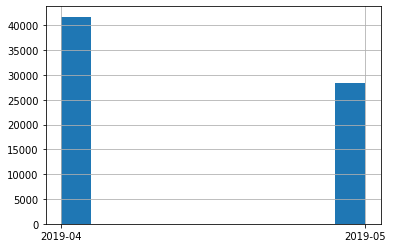

In [529]:
plt = df["first_txn_date_lazypay"].dt.strftime("%Y-%m").sort_index().hist()
plt

In [530]:
bad_rate=df[["month","dv"]].groupby("month").agg(["sum","count"])
bad_rate.columns=["_".join(x) for x in bad_rate.columns.ravel()]
bad_rate["rate"] = bad_rate["dv_sum"]/bad_rate["dv_count"]
bad_rate
#bad_rate["rate"] = bad_rate["sum"]/bad_rate["count"]

,dv_sum,dv_count,rate
month,,,
2019-04,1541,41771,0.036892
2019-05,1080,28474,0.037929


In [531]:
df.drop(columns = ["filter","is_repaid","scoring_date","mobile_hash"],inplace = True)

In [532]:
df.head()

,first_txn_date_lazypay,dv,total_count_12month,total_amount_12month,sale_count_12month,sale_amount_12month,total_count_6month,total_amount_6month,sale_count_6month,sale_amount_6month,...,dc_sale_per,ecommerce_ratio_180,acc_30_180_amount,acc_90_360_amount,acc_180_360_count,acc_180_360_amount,acc_30_90_amount_cc,acc_90_180_amount_cc,acc_180_360_amount_cc,month
0,2019-04-01,0,2,1500.0,1,750.0,2,1500.0,1,750.0,...,0.000000,0.333333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2019-04
1,2019-04-01,0,2,2940.0,0,0.0,2,2940.0,0,0.0,...,0.000000,0.000000,1.0,1.0,1.0,1.0,-10.0,-10.0,-10.0,2019-04
2,2019-04-01,0,1,1.0,0,0.0,0,0.0,0,0.0,...,-10.000000,-10.000000,-10.0,0.0,0.0,0.0,-10.0,-10.0,-10.0,2019-04
3,2019-04-01,1,1,1.0,1,1.0,0,0.0,0,0.0,...,-10.000000,-10.000000,-10.0,0.0,0.0,0.0,-10.0,-10.0,-10.0,2019-04
4,2019-04-01,0,3,727.0,1,75.0,3,727.0,1,75.0,...,0.333333,0.103164,0.0,1.0,1.0,1.0,-10.0,-10.0,-10.0,2019-04


In [454]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn import metrics
import xgboost as xgb

In [455]:
def fimportances(xc, predictors):
    importances = pd.DataFrame({'predictor': predictors, 'importance': xc.feature_importances_})
    importances = importances[importances['importance'] > 0]
    importances.sort_values(by='importance', ascending=False, inplace=True)
    importances.reset_index(inplace=True, drop=True)
    importances = importances[['predictor', 'importance']]
    return importances
    

In [537]:
df.select_dtypes(exclude=["int64","float64"]).dtypes

first_txn_date_lazypay    datetime64[ns]
month                             object
dtype: object

In [538]:
df_test = df[df["first_txn_date_lazypay"]>= datetime(2019,5,10)]
df_train = df[df["first_txn_date_lazypay"]< datetime(2019,5,10)]


In [539]:
X_test = df_test.drop(columns = "dv")
X_train = df_train.drop(columns = "dv")
Y_test = df_test["dv"]
Y_train = df_train["dv"]

In [540]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.3, stratify =X_train["month"], random_state = 4)

In [541]:
print("Event Rate Train: ", '{:,.2%}'.format(Y_train.sum()/Y_train.count()), "\t shape:", len(Y_train))
print("Event Rate Valid: ", '{:,.2%}'.format(Y_valid.sum()/Y_valid.count()), "\t shape:", len(Y_valid))
print("Event Rate Test: ", '{:,.2%}'.format(Y_test.sum()/Y_test.count()), "\t shape:", len(Y_test))



Event Rate Train:  3.63% 	 shape: 38073
Event Rate Valid:  3.79% 	 shape: 16317
Event Rate Test:  3.91% 	 shape: 15855


## Using hyperparameters from earlier model

In [473]:
param_grid = {'max_depth': np.arange(1,6),
              'learning_rate': np.arange(0.001, 0.02, 0.001),
              'subsample': np.arange(0.4, 0.7, 0.05),
              'min_child_weight': np.arange(1, 25, 3),
              'colsample_bytree': np.arange(0.5, 0.75, 0.05),
              'scale_pos_weight' :np.arange(5, 40, 2)
            }

param_dist = {'objective': 'binary:logistic', 'nthread': -1, 'n_estimators': 200}


In [474]:
xgb_model= xgb.XGBClassifier(**param_dist)

In [476]:
kfolds = StratifiedKFold(3, random_state=1)
clf = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, scoring=['roc_auc'], n_iter=100,
                         random_state=40, cv=kfolds.split(X_train.drop(columns=['first_txn_date_lazypay','month']), Y_train), refit='roc_auc',error_score=0, return_train_score =True, verbose = 2)

In [477]:
print("Randomized search..")

search_time_start = datetime.now()
clf.fit(X_train.drop(columns=['first_txn_date_lazypay','month']), np.ravel(Y_train))
print("Randomized search time:",  datetime.now() - search_time_start)

params = clf.best_params_   
dic=clf.cv_results_ 
tmp =  pd.DataFrame(dic["params"])

Randomized search..
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] subsample=0.6, scale_pos_weight=11, min_child_weight=13, max_depth=4, learning_rate=0.018000000000000002, colsample_bytree=0.7000000000000002 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.6, scale_pos_weight=11, min_child_weight=13, max_depth=4, learning_rate=0.018000000000000002, colsample_bytree=0.7000000000000002, total=  14.9s
[CV] subsample=0.6, scale_pos_weight=11, min_child_weight=13, max_depth=4, learning_rate=0.018000000000000002, colsample_bytree=0.7000000000000002 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.2s remaining:    0.0s


[CV]  subsample=0.6, scale_pos_weight=11, min_child_weight=13, max_depth=4, learning_rate=0.018000000000000002, colsample_bytree=0.7000000000000002, total=  14.5s
[CV] subsample=0.6, scale_pos_weight=11, min_child_weight=13, max_depth=4, learning_rate=0.018000000000000002, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.6, scale_pos_weight=11, min_child_weight=13, max_depth=4, learning_rate=0.018000000000000002, colsample_bytree=0.7000000000000002, total=  14.5s
[CV] subsample=0.55, scale_pos_weight=13, min_child_weight=1, max_depth=5, learning_rate=0.011, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.55, scale_pos_weight=13, min_child_weight=1, max_depth=5, learning_rate=0.011, colsample_bytree=0.7000000000000002, total=  19.1s
[CV] subsample=0.55, scale_pos_weight=13, min_child_weight=1, max_depth=5, learning_rate=0.011, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.55, scale_pos_weight=13, min_child_weight=1, max_depth=5, learning_rate=0.011, colsample_bytre

[CV]  subsample=0.55, scale_pos_weight=33, min_child_weight=16, max_depth=2, learning_rate=0.009000000000000001, colsample_bytree=0.6000000000000001, total=  10.7s
[CV] subsample=0.55, scale_pos_weight=33, min_child_weight=16, max_depth=2, learning_rate=0.009000000000000001, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.55, scale_pos_weight=33, min_child_weight=16, max_depth=2, learning_rate=0.009000000000000001, colsample_bytree=0.6000000000000001, total=  10.7s
[CV] subsample=0.6499999999999999, scale_pos_weight=11, min_child_weight=19, max_depth=1, learning_rate=0.014000000000000002, colsample_bytree=0.55 
[CV]  subsample=0.6499999999999999, scale_pos_weight=11, min_child_weight=19, max_depth=1, learning_rate=0.014000000000000002, colsample_bytree=0.55, total=   8.3s
[CV] subsample=0.6499999999999999, scale_pos_weight=11, min_child_weight=19, max_depth=1, learning_rate=0.014000000000000002, colsample_bytree=0.55 
[CV]  subsample=0.6499999999999999, scale_pos_weight=11, min_

[CV]  subsample=0.6499999999999999, scale_pos_weight=21, min_child_weight=1, max_depth=1, learning_rate=0.007, colsample_bytree=0.6000000000000001, total=   8.5s
[CV] subsample=0.5, scale_pos_weight=19, min_child_weight=16, max_depth=3, learning_rate=0.003, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.5, scale_pos_weight=19, min_child_weight=16, max_depth=3, learning_rate=0.003, colsample_bytree=0.6000000000000001, total=  12.9s
[CV] subsample=0.5, scale_pos_weight=19, min_child_weight=16, max_depth=3, learning_rate=0.003, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.5, scale_pos_weight=19, min_child_weight=16, max_depth=3, learning_rate=0.003, colsample_bytree=0.6000000000000001, total=  12.7s
[CV] subsample=0.5, scale_pos_weight=19, min_child_weight=16, max_depth=3, learning_rate=0.003, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.5, scale_pos_weight=19, min_child_weight=16, max_depth=3, learning_rate=0.003, colsample_bytree=0.6000000000000001, total=  1

[CV]  subsample=0.55, scale_pos_weight=5, min_child_weight=1, max_depth=1, learning_rate=0.010000000000000002, colsample_bytree=0.55, total=   8.1s
[CV] subsample=0.6499999999999999, scale_pos_weight=27, min_child_weight=16, max_depth=3, learning_rate=0.019000000000000003, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.6499999999999999, scale_pos_weight=27, min_child_weight=16, max_depth=3, learning_rate=0.019000000000000003, colsample_bytree=0.7000000000000002, total=  14.1s
[CV] subsample=0.6499999999999999, scale_pos_weight=27, min_child_weight=16, max_depth=3, learning_rate=0.019000000000000003, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.6499999999999999, scale_pos_weight=27, min_child_weight=16, max_depth=3, learning_rate=0.019000000000000003, colsample_bytree=0.7000000000000002, total=  14.2s
[CV] subsample=0.6499999999999999, scale_pos_weight=27, min_child_weight=16, max_depth=3, learning_rate=0.019000000000000003, colsample_bytree=0.7000000000000002 
[CV]  s

[CV]  subsample=0.45, scale_pos_weight=35, min_child_weight=22, max_depth=1, learning_rate=0.015, colsample_bytree=0.6000000000000001, total=   8.1s
[CV] subsample=0.45, scale_pos_weight=35, min_child_weight=22, max_depth=1, learning_rate=0.015, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.45, scale_pos_weight=35, min_child_weight=22, max_depth=1, learning_rate=0.015, colsample_bytree=0.6000000000000001, total=   8.2s
[CV] subsample=0.5, scale_pos_weight=9, min_child_weight=4, max_depth=5, learning_rate=0.005, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.5, scale_pos_weight=9, min_child_weight=4, max_depth=5, learning_rate=0.005, colsample_bytree=0.7000000000000002, total=  18.9s
[CV] subsample=0.5, scale_pos_weight=9, min_child_weight=4, max_depth=5, learning_rate=0.005, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.5, scale_pos_weight=9, min_child_weight=4, max_depth=5, learning_rate=0.005, colsample_bytree=0.7000000000000002, total=  19.0s
[CV] subsample

[CV]  subsample=0.6, scale_pos_weight=15, min_child_weight=19, max_depth=5, learning_rate=0.007, colsample_bytree=0.7000000000000002, total=  20.6s
[CV] subsample=0.6, scale_pos_weight=15, min_child_weight=19, max_depth=5, learning_rate=0.007, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.6, scale_pos_weight=15, min_child_weight=19, max_depth=5, learning_rate=0.007, colsample_bytree=0.7000000000000002, total=  19.4s
[CV] subsample=0.6, scale_pos_weight=15, min_child_weight=19, max_depth=5, learning_rate=0.007, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.6, scale_pos_weight=15, min_child_weight=19, max_depth=5, learning_rate=0.007, colsample_bytree=0.7000000000000002, total=  19.2s
[CV] subsample=0.4, scale_pos_weight=7, min_child_weight=16, max_depth=4, learning_rate=0.014000000000000002, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.4, scale_pos_weight=7, min_child_weight=16, max_depth=4, learning_rate=0.014000000000000002, colsample_bytree=0.6000000000000

[CV]  subsample=0.55, scale_pos_weight=37, min_child_weight=16, max_depth=2, learning_rate=0.017, colsample_bytree=0.7000000000000002, total=  11.4s
[CV] subsample=0.55, scale_pos_weight=37, min_child_weight=16, max_depth=2, learning_rate=0.017, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.55, scale_pos_weight=37, min_child_weight=16, max_depth=2, learning_rate=0.017, colsample_bytree=0.7000000000000002, total=  13.4s
[CV] subsample=0.5, scale_pos_weight=15, min_child_weight=7, max_depth=3, learning_rate=0.007, colsample_bytree=0.6500000000000001 
[CV]  subsample=0.5, scale_pos_weight=15, min_child_weight=7, max_depth=3, learning_rate=0.007, colsample_bytree=0.6500000000000001, total=  13.7s
[CV] subsample=0.5, scale_pos_weight=15, min_child_weight=7, max_depth=3, learning_rate=0.007, colsample_bytree=0.6500000000000001 
[CV]  subsample=0.5, scale_pos_weight=15, min_child_weight=7, max_depth=3, learning_rate=0.007, colsample_bytree=0.6500000000000001, total=  13.4s
[CV] subsa

[CV]  subsample=0.55, scale_pos_weight=7, min_child_weight=13, max_depth=1, learning_rate=0.007, colsample_bytree=0.6000000000000001, total=   9.5s
[CV] subsample=0.55, scale_pos_weight=7, min_child_weight=13, max_depth=1, learning_rate=0.007, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.55, scale_pos_weight=7, min_child_weight=13, max_depth=1, learning_rate=0.007, colsample_bytree=0.6000000000000001, total=  12.5s
[CV] subsample=0.55, scale_pos_weight=7, min_child_weight=13, max_depth=1, learning_rate=0.007, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.55, scale_pos_weight=7, min_child_weight=13, max_depth=1, learning_rate=0.007, colsample_bytree=0.6000000000000001, total=  12.0s
[CV] subsample=0.55, scale_pos_weight=5, min_child_weight=13, max_depth=1, learning_rate=0.017, colsample_bytree=0.55 
[CV]  subsample=0.55, scale_pos_weight=5, min_child_weight=13, max_depth=1, learning_rate=0.017, colsample_bytree=0.55, total=  11.4s
[CV] subsample=0.55, scale_pos_weight

[CV]  subsample=0.55, scale_pos_weight=11, min_child_weight=4, max_depth=4, learning_rate=0.003, colsample_bytree=0.6000000000000001, total=  31.1s
[CV] subsample=0.55, scale_pos_weight=11, min_child_weight=4, max_depth=4, learning_rate=0.003, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.55, scale_pos_weight=11, min_child_weight=4, max_depth=4, learning_rate=0.003, colsample_bytree=0.6000000000000001, total=  29.5s
[CV] subsample=0.55, scale_pos_weight=11, min_child_weight=4, max_depth=4, learning_rate=0.003, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.55, scale_pos_weight=11, min_child_weight=4, max_depth=4, learning_rate=0.003, colsample_bytree=0.6000000000000001, total=  30.8s
[CV] subsample=0.5, scale_pos_weight=31, min_child_weight=10, max_depth=3, learning_rate=0.008, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.5, scale_pos_weight=31, min_child_weight=10, max_depth=3, learning_rate=0.008, colsample_bytree=0.6000000000000001, total=  26.1s
[CV] subs

[CV]  subsample=0.4, scale_pos_weight=23, min_child_weight=16, max_depth=1, learning_rate=0.003, colsample_bytree=0.6000000000000001, total=  16.7s
[CV] subsample=0.4, scale_pos_weight=23, min_child_weight=16, max_depth=1, learning_rate=0.003, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.4, scale_pos_weight=23, min_child_weight=16, max_depth=1, learning_rate=0.003, colsample_bytree=0.6000000000000001, total=  16.7s
[CV] subsample=0.4, scale_pos_weight=23, min_child_weight=16, max_depth=1, learning_rate=0.003, colsample_bytree=0.6000000000000001 
[CV]  subsample=0.4, scale_pos_weight=23, min_child_weight=16, max_depth=1, learning_rate=0.003, colsample_bytree=0.6000000000000001, total=  16.5s
[CV] subsample=0.6499999999999999, scale_pos_weight=35, min_child_weight=16, max_depth=1, learning_rate=0.010000000000000002, colsample_bytree=0.5 
[CV]  subsample=0.6499999999999999, scale_pos_weight=35, min_child_weight=16, max_depth=1, learning_rate=0.010000000000000002, colsample_bytre

[CV]  subsample=0.55, scale_pos_weight=29, min_child_weight=13, max_depth=1, learning_rate=0.004, colsample_bytree=0.7000000000000002, total=  17.8s
[CV] subsample=0.55, scale_pos_weight=29, min_child_weight=13, max_depth=1, learning_rate=0.004, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.55, scale_pos_weight=29, min_child_weight=13, max_depth=1, learning_rate=0.004, colsample_bytree=0.7000000000000002, total=  18.1s
[CV] subsample=0.6499999999999999, scale_pos_weight=5, min_child_weight=22, max_depth=3, learning_rate=0.007, colsample_bytree=0.5 
[CV]  subsample=0.6499999999999999, scale_pos_weight=5, min_child_weight=22, max_depth=3, learning_rate=0.007, colsample_bytree=0.5, total=  24.4s
[CV] subsample=0.6499999999999999, scale_pos_weight=5, min_child_weight=22, max_depth=3, learning_rate=0.007, colsample_bytree=0.5 
[CV]  subsample=0.6499999999999999, scale_pos_weight=5, min_child_weight=22, max_depth=3, learning_rate=0.007, colsample_bytree=0.5, total=  24.1s
[CV] subsa

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 80.0min finished


Randomized search time: 1:20:34.844502


In [482]:
print("Best score: {}".format(clf.best_score_))    #best auc score as we took that for refit 

Best score: 0.5316820015799879


In [483]:
print("Best params: ")

for param_name in sorted(params.keys()):
    print('%s: %r' % (param_name, params[param_name]))
    
#update estimated hyperparameter values to new model
params.update(param_dist)

xgb_model = xgb.XGBClassifier(**params)

Best params: 
colsample_bytree: 0.5
learning_rate: 0.007
max_depth: 3
min_child_weight: 22
n_estimators: 200
nthread: -1
objective: 'binary:logistic'
scale_pos_weight: 5
subsample: 0.6499999999999999


In [484]:
tmp["mean_train_roc_auc"] = dic['mean_train_roc_auc']
tmp["mean_test_roc_auc"] = dic['mean_test_roc_auc']

In [481]:
tmp.to_csv("random_search_cv_results_existing_customers.csv")

In [533]:
#Using stable model
params = {'max_depth': 1,
              'learning_rate': 0.003,
              'subsample': 0.4,
              'min_child_weight': 16,
              'colsample_bytree': 0.6,
              'scale_pos_weight' :23,
              'objective': 'binary:logistic', 'nthread': -1, 'n_estimators': 200
            }
xgb_model = xgb.XGBClassifier(**params)

In [542]:
cpu = -1
early_stopping_round=40
#early_stopping_round=None

auc_cv = cross_val_score(xgb_model, X_train.drop(columns=['first_txn_date_lazypay','month']), Y_train, scoring='roc_auc', cv=kfolds.split(X_train.drop(columns=['first_txn_date_lazypay','month']), Y_train),
                         n_jobs=cpu)
gini_cv = (2 * np.array(auc_cv) - 1).mean()


bst = xgb_model.fit(X_train.drop(columns=['first_txn_date_lazypay','month']), np.ravel(Y_train), eval_metric="auc", eval_set=[(X_test.drop(columns=['first_txn_date_lazypay','month']), np.ravel(Y_test))],
                    early_stopping_rounds=early_stopping_round,  verbose=True)


if early_stopping_round is None:
    ypred_train = bst.predict_proba(X_train.drop(columns=['first_txn_date_lazypay','month']))[:, 1]
    ypred_valid = bst.predict_proba(X_valid.drop(columns=['first_txn_date_lazypay','month']))[:, 1]
else:
    ypred_train = bst.predict_proba(X_train.drop(columns=['first_txn_date_lazypay','month']), ntree_limit=bst.best_ntree_limit)[:, 1]
    ypred_valid = bst.predict_proba(X_valid.drop(columns=['first_txn_date_lazypay','month']), ntree_limit=bst.best_ntree_limit)[:, 1]

metric_auc_train = metrics.roc_auc_score(Y_train, ypred_train)
metric_auc_valid = metrics.roc_auc_score(Y_valid, ypred_valid)

gini_train = 2 * metric_auc_train - 1
gini_valid = 2 * metric_auc_valid - 1


importance_tbl = fimportances(bst, X_train.drop(columns=['first_txn_date_lazypay','month']).columns)
importance_tbl.to_csv(os.getcwd()+"/varimpt_post_hp_tuning_"+datetime.now().strftime("%d_%b_%H")+"hrs.csv",index=0)


print("GINI TRAIN:",gini_train )
print("\nGINI VALID:",gini_valid )
print("\nGINI CV:",gini_cv )

[0]	validation_0-auc:0.522105
Will train until validation_0-auc hasn't improved in 40 rounds.
[1]	validation_0-auc:0.524741
[2]	validation_0-auc:0.522573
[3]	validation_0-auc:0.523861
[4]	validation_0-auc:0.528458
[5]	validation_0-auc:0.534542
[6]	validation_0-auc:0.537828
[7]	validation_0-auc:0.534635
[8]	validation_0-auc:0.539184
[9]	validation_0-auc:0.54003
[10]	validation_0-auc:0.530438
[11]	validation_0-auc:0.532686
[12]	validation_0-auc:0.533599
[13]	validation_0-auc:0.534165
[14]	validation_0-auc:0.533498
[15]	validation_0-auc:0.536418
[16]	validation_0-auc:0.536882
[17]	validation_0-auc:0.53547
[18]	validation_0-auc:0.538696
[19]	validation_0-auc:0.541536
[20]	validation_0-auc:0.540676
[21]	validation_0-auc:0.540785
[22]	validation_0-auc:0.541574
[23]	validation_0-auc:0.541562
[24]	validation_0-auc:0.54045
[25]	validation_0-auc:0.540339
[26]	validation_0-auc:0.540135
[27]	validation_0-auc:0.540103
[28]	validation_0-auc:0.539708
[29]	validation_0-auc:0.539483
[30]	validation_0-a

In [544]:
importance_tbl

,predictor,importance
0,days_since_first_sale_trans,0.042269
1,days_since_first_trans,0.042072
2,Apple_amount_180_ratio,0.041622
3,sale_amount_12to24_month,0.040293
4,Apple_amount_90,0.038730
5,bounced_amount_360,0.038211
6,total_amount_12to24_month,0.037881
7,top_merchant,0.037298
8,Apple_count_90,0.036839
9,days_on_pg,0.036234


In [547]:
bst1 = bst
imp = importance_tbl
X_train_1 = X_train.drop(columns=['first_txn_date_lazypay','month'])
X_valid_1 = X_valid.drop(columns=['first_txn_date_lazypay','month'])
select_X_train = X_train_1

dic_imp = {"n":[imp.shape[0]],"Gini Train":[0],"Gini Valid":[0],"Predictors":[list(imp['predictor'])]}

while(select_X_train.shape[1] > 1):
    select_X_train = X_train_1[list(imp['predictor'])[:-1]]
    select_X_valid = X_valid_1[list(imp['predictor'])[:-1]]
    xgb_model = xgb.XGBClassifier(**params)

    evals=[(select_X_train, np.ravel(Y_train)),(select_X_valid, np.ravel(Y_valid))]

    bst = xgb_model.fit(select_X_train, np.ravel(Y_train), eval_metric="auc", eval_set=evals,
                        early_stopping_rounds=None   ,  verbose=False)
   
    ypred_train = bst.predict_proba(select_X_train)[:, 1]
    ypred_valid  = bst.predict_proba(select_X_valid)[:, 1]
   
    metric_auc_train = metrics.roc_auc_score(Y_train, ypred_train)
    metric_auc_valid = metrics.roc_auc_score(Y_valid, ypred_valid)

    gini_train = 2 * metric_auc_train - 1
    gini_valid = 2 * metric_auc_valid - 1
   
    print("Columns Remaining : %d , gini_train: %f,gini_valid: %f "%(select_X_train.shape[1],gini_train,gini_valid))
   
    dic_imp['n'].append(imp.shape[0]-1)
    dic_imp['Gini Train'].append(gini_train)
    dic_imp['Gini Valid'].append(gini_valid)
    dic_imp['Predictors'].append(list(imp['predictor'])[:-1])
   
    imp = fimportances(bst,select_X_train.columns)

Columns Remaining : 29 , gini_train: 0.116467,gini_valid: 0.091667 
Columns Remaining : 28 , gini_train: 0.116809,gini_valid: 0.095048 
Columns Remaining : 27 , gini_train: 0.117634,gini_valid: 0.096638 
Columns Remaining : 26 , gini_train: 0.114506,gini_valid: 0.095773 
Columns Remaining : 22 , gini_train: 0.112663,gini_valid: 0.096582 
Columns Remaining : 20 , gini_train: 0.115646,gini_valid: 0.094617 
Columns Remaining : 19 , gini_train: 0.115394,gini_valid: 0.094503 
Columns Remaining : 17 , gini_train: 0.115439,gini_valid: 0.096342 
Columns Remaining : 16 , gini_train: 0.110489,gini_valid: 0.095818 
Columns Remaining : 15 , gini_train: 0.114153,gini_valid: 0.096253 
Columns Remaining : 14 , gini_train: 0.111857,gini_valid: 0.096014 
Columns Remaining : 13 , gini_train: 0.107996,gini_valid: 0.096917 
Columns Remaining : 12 , gini_train: 0.107646,gini_valid: 0.094257 
Columns Remaining : 11 , gini_train: 0.106252,gini_valid: 0.092655 
Columns Remaining : 10 , gini_train: 0.106854,gi

In [548]:
pd.DataFrame(dic_imp).to_csv("backward_elimination_wo_early_stopping_existing_customers_2.csv")

In [551]:
early_stopping_round=40
xgb_model = xgb.XGBClassifier(**params)
selected_variables = ['days_since_first_sale_trans', 'bounced_amount_360', 'total_amount_12to24_month', 'days_since_first_trans', 'days_since_last_trans', 'sale_amount_12to24_month', 'days_on_pg', 'frequency_of_transaction', 'dropped_amount_180', 'Apple_amount_90', 'top_merchants_txn_cc_amount_180', 'days_since_first_cc_trans', 'days_since_first_dc_trans', 'days_since_first_failed_trans', 'Apple_count_180_ratio', 'top_payment_mode_count']




bst = xgb_model.fit(X_train[selected_variables], np.ravel(Y_train), eval_metric="auc", eval_set=[(X_valid[selected_variables], np.ravel(Y_valid))],
                    early_stopping_rounds=early_stopping_round,  verbose=True)

auc_cv = cross_val_score(bst, X_train[selected_variables], Y_train, scoring='roc_auc', cv=kfolds.split(X_train[selected_variables], Y_train),
                         n_jobs=cpu)
gini_cv = (2 * np.array(auc_cv) - 1).mean()


if early_stopping_round is None:
    ypred_train = bst.predict_proba(X_train[selected_variables])[:, 1]
    ypred_test = bst.predict_proba(X_test[selected_variables])[:, 1]
    ypred_valid = bst.predict_proba(X_valid[selected_variables])[:, 1]

else:
    ypred_train = bst.predict_proba(X_train[selected_variables], ntree_limit=bst.best_ntree_limit)[:, 1]
    ypred_test = bst.predict_proba(X_test[selected_variables], ntree_limit=bst.best_ntree_limit)[:, 1]
    ypred_valid = bst.predict_proba(X_valid[selected_variables], ntree_limit=bst.best_ntree_limit)[:, 1]

    
metric_auc_train = metrics.roc_auc_score(Y_train, ypred_train)
metric_auc_test = metrics.roc_auc_score(Y_test, ypred_test)
metric_auc_valid = metrics.roc_auc_score(Y_valid, ypred_valid)


gini_train = 2 * metric_auc_train - 1
gini_valid = 2 * metric_auc_valid - 1
gini_test = 2 * metric_auc_test - 1


importance_tbl = fimportances(bst, X_train[selected_variables].columns)
importance_tbl.to_csv(os.getcwd()+"/varimpt_model_v6.csv",index=0)


print("GINI TRAIN:",gini_train )
print("GINI VALID:",gini_valid)
print("\nGINI TEST:",gini_test)
print("\nGINI CV:",gini_cv)

[0]	validation_0-auc:0.518006
Will train until validation_0-auc hasn't improved in 40 rounds.
[1]	validation_0-auc:0.521931
[2]	validation_0-auc:0.531754
[3]	validation_0-auc:0.543339
[4]	validation_0-auc:0.551157
[5]	validation_0-auc:0.550921
[6]	validation_0-auc:0.552541
[7]	validation_0-auc:0.551043
[8]	validation_0-auc:0.551088
[9]	validation_0-auc:0.551605
[10]	validation_0-auc:0.550883
[11]	validation_0-auc:0.55161
[12]	validation_0-auc:0.546365
[13]	validation_0-auc:0.546478
[14]	validation_0-auc:0.547636
[15]	validation_0-auc:0.5457
[16]	validation_0-auc:0.545377
[17]	validation_0-auc:0.544688
[18]	validation_0-auc:0.543903
[19]	validation_0-auc:0.543905
[20]	validation_0-auc:0.548135
[21]	validation_0-auc:0.548463
[22]	validation_0-auc:0.548068
[23]	validation_0-auc:0.54688
[24]	validation_0-auc:0.549202
[25]	validation_0-auc:0.549184
[26]	validation_0-auc:0.550146
[27]	validation_0-auc:0.549194
[28]	validation_0-auc:0.549032
[29]	validation_0-auc:0.548238
[30]	validation_0-au

In [554]:
import pickle

pickle.dump(bst, open(os.getcwd()+"model_v12.sav", 'wb'))


In [556]:
loaded_model= pickle.load(open(os.getcwd()+"model_v11.sav", 'rb'))

In [558]:
bst = loaded_model
ypred_test = bst.predict_proba(X_test[['days_since_first_sale_trans', 'days_since_first_trans', 'days_on_pg', 'total_amount_12to24_month', 'dropped_count_360']], ntree_limit=bst.best_ntree_limit)[:, 1]


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.04')

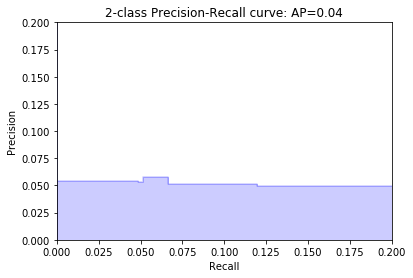

In [560]:

from matplotlib import pyplot as plt
precision, recall, _ = metrics.precision_recall_curve(Y_test, ypred_test)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 0.2])
plt.xlim([0.0, 0.2])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(metrics.average_precision_score(Y_test, ypred_test)))



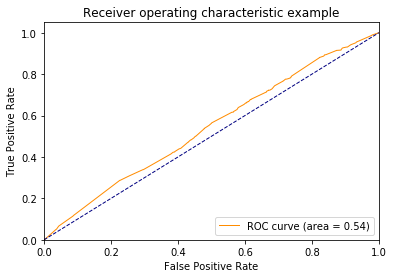

In [561]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test.ravel(), ypred_test.ravel())
roc_auc = metrics.auc(fpr, tpr)
plt.figure()

lw = 1
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [577]:
df["YPRED_TEST"] = bst.predict_proba(df[['days_since_first_sale_trans', 'days_since_first_trans', 'days_on_pg', 'total_amount_12to24_month', 'dropped_count_360']], ntree_limit=bst.best_ntree_limit)[:, 1]


In [567]:
df1 = pd.read_csv(r"C:\Users\shantanu.sharma\Desktop\HC\Data Files\loan performance.csv")

C:\Users\shantanu.sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [572]:
df1.head()
df1= df1[["TEXT_MOBILE","TIME_DECISION_DATE","RISK_SCORE"]]

In [580]:
df2 = df.merge(df1, left_on = "mobile_hash", right_on = "TEXT_MOBILE")

In [581]:
df2.head()

,first_txn_date_lazypay,mobile_hash,dv,filter,is_repaid,total_count_12month,total_amount_12month,sale_count_12month,sale_amount_12month,total_count_6month,...,acc_180_360_amount,acc_30_90_amount_cc,acc_90_180_amount_cc,acc_180_360_amount_cc,scoring_date,month,YPRED_TEST,TEXT_MOBILE,TIME_DECISION_DATE,RISK_SCORE
0,2019-04-01,6306263143,0,1,Y,2,1500.0,1,750.0,2,...,1.0,1.0,1.0,1.0,31-12-2019,2019-04,0.499701,6306263143,01-04-19,NaN
1,2019-04-01,6351342162,0,1,Y,2,2940.0,0,0.0,2,...,1.0,-10.0,-10.0,-10.0,31-12-2019,2019-04,0.499701,6351342162,18-10-18,0.098828
2,2019-04-01,6351342162,0,1,Y,2,2940.0,0,0.0,2,...,1.0,-10.0,-10.0,-10.0,31-12-2019,2019-04,0.499701,6351342162,01-04-19,NaN
3,2019-04-01,6351342162,0,1,Y,2,2940.0,0,0.0,2,...,1.0,-10.0,-10.0,-10.0,31-12-2019,2019-04,0.499701,6351342162,11-07-19,0.021340
4,2019-04-01,6354606412,0,1,Y,1,1.0,0,0.0,0,...,0.0,-10.0,-10.0,-10.0,31-12-2019,2019-04,0.498881,6354606412,20-07-18,NaN


In [18]:
import pickle
loaded_model= pickle.load(open(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Payu Modelling exercise backup\models\HCmodel_v11.sav", 'rb'))

In [19]:
import xgboost
loaded_model.get_booster().feature_names

['days_since_first_sale_trans',
 'days_since_first_trans',
 'days_on_pg',
 'total_amount_12to24_month',
 'dropped_count_360']